In [1]:
#libraries to install
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [54]:
#reading the data
heart_data<-read_csv("/home/jovyan/heart_disease_analysis/heart.csv")
heart_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1    52  1   0  125      212  0   1       168     0     1.0     2     2  3   
2    53  1   0  140      203  1   0       155     1     3.1     0     0  3   
3    70  1   0  145      174  0   1       125     1     2.6     0     0  3   
4    61  1   0  148      203  0   1       161     0     0.0     2     1  3   
5    62  0   0  138      294  1   1       106     0     1.9     1     3  2   
6    58  0   0  100      248  0   0       122     0     1.0     1     0  2   
7    58  1   0  114      318  0   2       140     0     4.4     0     3  1   
8    55  1   0  160      289  0   0       145     1     0.8     1     1  3   
9    46  1   0  120      249  0   0       144     0     0.8     2     0  3   
10   54  1   0  122      286  0   0       116     1     3.2     1     2  2   
11   71  0   0  112      149  0   1       125     0     1.6     1     0  2   
12   43  0   0  132      341  1   0       136     1     3.0     1     0  3   
13   34  0   1  118      210  0   1       192     0     0.7     2     0  2   
14   51  1   0  140      298  0   1       122     1     4.2     1     3  3   
15   52  1   0  128      204  1   1       156     1     1.0     1     0  0   
16   34  0   1  118      210  0   1       192     0     0.7     2     0  2   
17   51  0   2  140      308  0   0       142     0     1.5     2     1  2   
18   54  1   0  124      266  0   0       109     1     2.2     1     1  3   
19   50  0   1  120      244  0   1       162     0     1.1     2     0  2   
20   58  1   2  140      211  1   0       165     0     0.0     2     0  2   
21   60  1   2  140      185  0   0       155     0     3.0     1     0  2   
22   67  0   0  106      223  0   1       142     0     0.3     2     2  2   
23   45  1   0  104      208  0   0       148     1     3.0     1     0  2   
24   63  0   2  135      252  0   0       172     0     0.0     2     0  2   
25   42  0   2  120      209  0   1       173     0     0.0     1     0  2   
26   61  0   0  145      307  0   0       146     1     1.0     1     0  3   
27   44  1   2  130      233  0   1       179     1     0.4     2     0  2   
28   58  0   1  136      319  1   0       152     0     0.0     2     2  2   
29   56  1   2  130      256  1   0       142     1     0.6     1     1  1   
30   55  0   0  180      327  0   2       117     1     3.4     1     0  2   
⋮    ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
996  44  1   1  120      263  0   1       173     0     0.0     2     0  3   
997  56  0   0  134      409  0   0       150     1     1.9     1     2  3   
998  54  1   0  120      188  0   1       113     0     1.4     1     1  3   
999  42  1   0  136      315  0   1       125     1     1.8     1     0  1   
1000 67  1   0  125      254  1   1       163     0     0.2     1     2  3   
1001 64  1   0  145      212  0   0       132     0     2.0     1     2  1   
1002 42  1   0  140      226  0   1       178     0     0.0     2     0  2   
1003 66  1   0  112      212  0   0       132     1     0.1     2     1  2   
1004 52  1   0  108      233  1   1       147     0     0.1     2     3  3   
1005 51  0   2  140      308  0   0       142     0     1.5     2     1  2   
1006 55  0   0  128      205  0   2       130     1     2.0     1     1  3   
1007 58  1   2  140      211  1   0       165     0     0.0     2     0  2   
1008 56  1   3  120      193  0   0       162     0     1.9     1     0  3   
1009 42  1   1  120      295  0   1       162     0     0.0     2     0  2   
1010 40  1   0  152      223  0   1       181     0     0.0     2     0  3   
1011 51  1   0  140      299  0   1       173     1     1.6     2     0  3   
1012 45  1   1  128      308  0   0       170     0     0.0     2     0  2   
1013 48  1   1  110      229  0   1       168     0     1.0     0     0  3   
1014 58  1   0  114      318  0   2       140     0     4.4     0     3  1   
1015 44  0   2  108      14

In [9]:
#RUN THESE ONLY IF YOU WANT TO LOOK AT DATA OF PEOPLE HAVING HEART DISEASE VS NO HEART DISEASE
#exploratory_table1<-heart_data|>
#filter(target== 1)
#exploratory_table1

#exploratory_table2<-heart_data|>
#filter(target== 0)
#exploratory_table2



In [7]:
# Compute correlations
correlations <- cor(heart_data)

# Get correlations with target
cor_with_target <- correlations["target",]
sorted_cor <- sort(abs(cor_with_target), decreasing = TRUE)
print(sorted_cor)


    target    oldpeak      exang         cp    thalach         ca      slope 
1.00000000 0.43844127 0.43802855 0.43485425 0.42289550 0.38208529 0.34551175 
      thal        sex        age   trestbps    restecg       chol        fbs 
0.33783815 0.27950076 0.22932355 0.13877173 0.13446821 0.09996559 0.04116355 


In [10]:
#creating the split

heart_split <- initial_split(heart_data, prop = 0.75, strata = target)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)


In [18]:
#number of people with heart disease vs no heart disease in the training dataset.

heart_target_groups<- heart_training|>
group_by(target)|>
summarize(n=n())
heart_target_groups

target n  
1 0      374
2 1      394

In [29]:
#predictors average 
heart_predictors_avg<- heart_training|>
summarise( mean_age = mean(age, na.rm = TRUE),
    mean_trestbps = mean(trestbps, na.rm = TRUE),
    mean_chol = mean(chol, na.rm = TRUE) )

heart_predictors_avg


#using an average for categorical chest pain variable (1-4 types) does not make sense, therefore I used count
chest_pain_count <- heart_training |>
  group_by(cp) |>
  summarize(count = n())

chest_pain_count
#using an average for categorical sex variable does not make sense, therefore I used count
sex_count <- heart_training |>
  group_by(sex) |>
  summarize(count = n())

sex_count

#cholesterol detailed summary
chol_summary<- heart_training|>
summarise (    mean_chol = mean(chol, na.rm = TRUE),
            min_chol = min(chol, na.rm = TRUE),
            max_chol = max(chol, na.rm = TRUE))
chol_summary

#Resting blood pressure detailed summary
trestbps_summary <- heart_training |>
  summarise(mean_trestbps = mean(trestbps, na.rm = TRUE),
    min_trestbps = min(trestbps, na.rm = TRUE),
    max_trestbps = max(trestbps, na.rm = TRUE) )

trestbps_summary


mean_age mean_trestbps mean_chol
1 54.44271 131.4609      244.776

cp count
1 0  380  
2 1  115  
3 2  209  
4 3   64

sex count
1 0   213  
2 1   555

mean_chol min_chol max_chol
1 244.776   126      564

mean_trestbps min_trestbps max_trestbps
1 131.4609      94           200

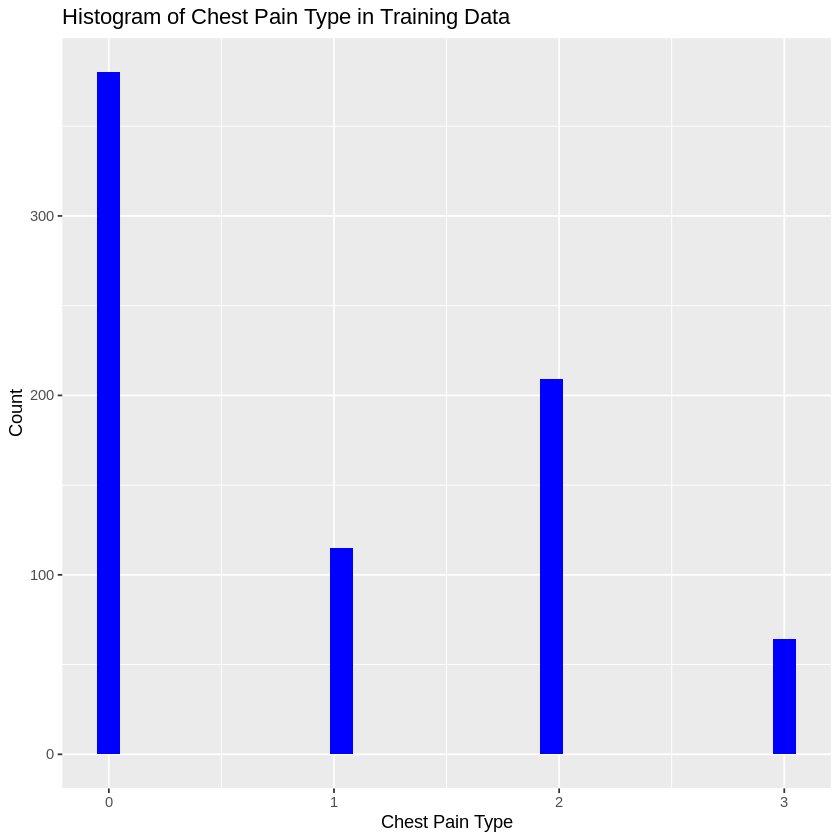

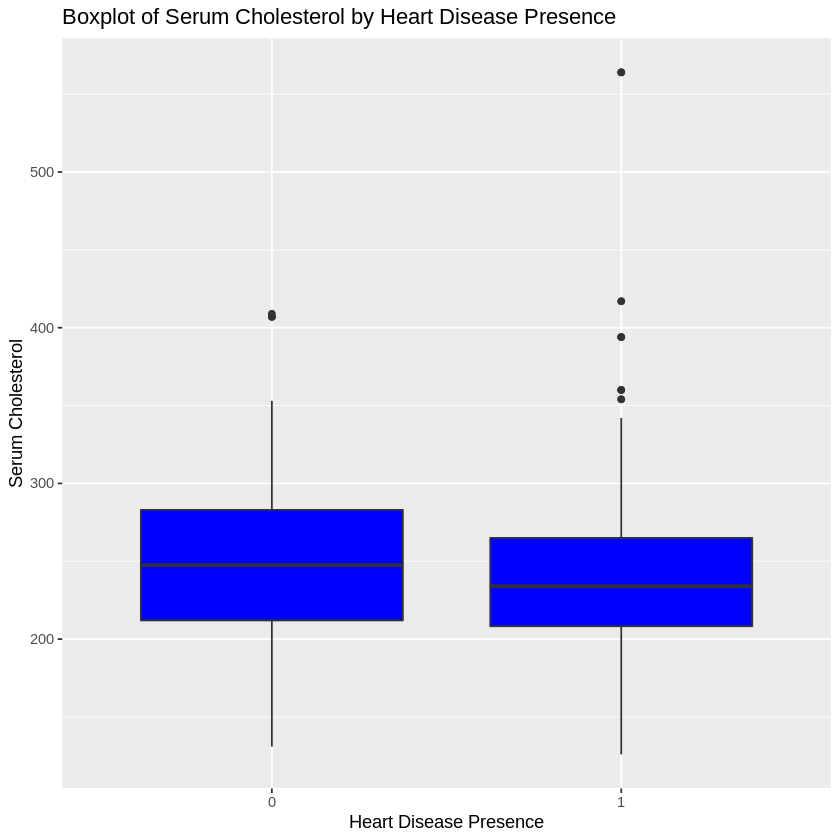

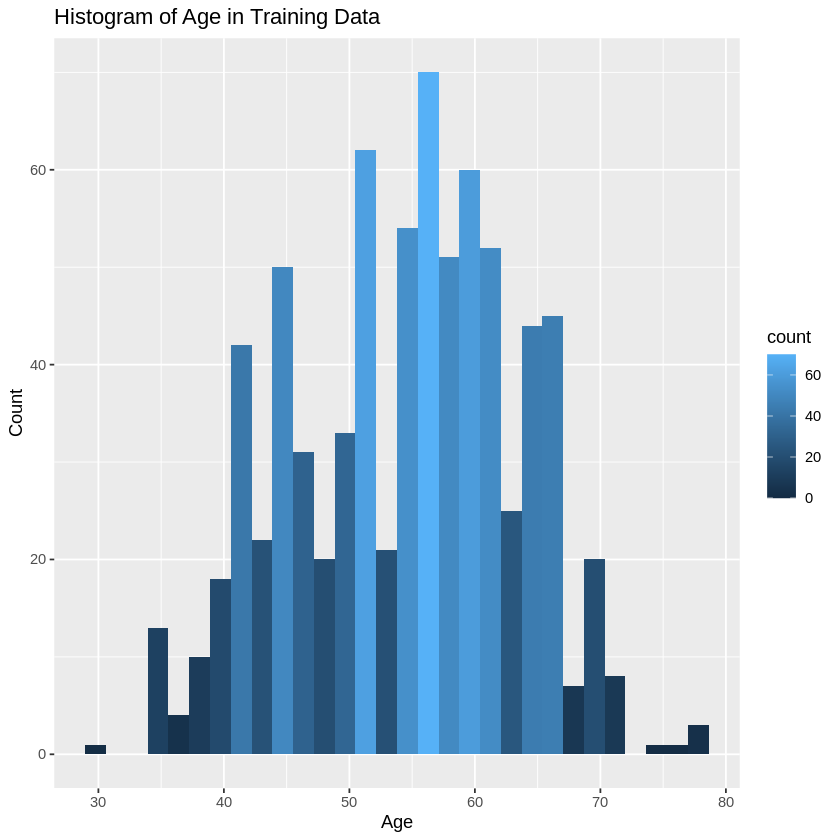

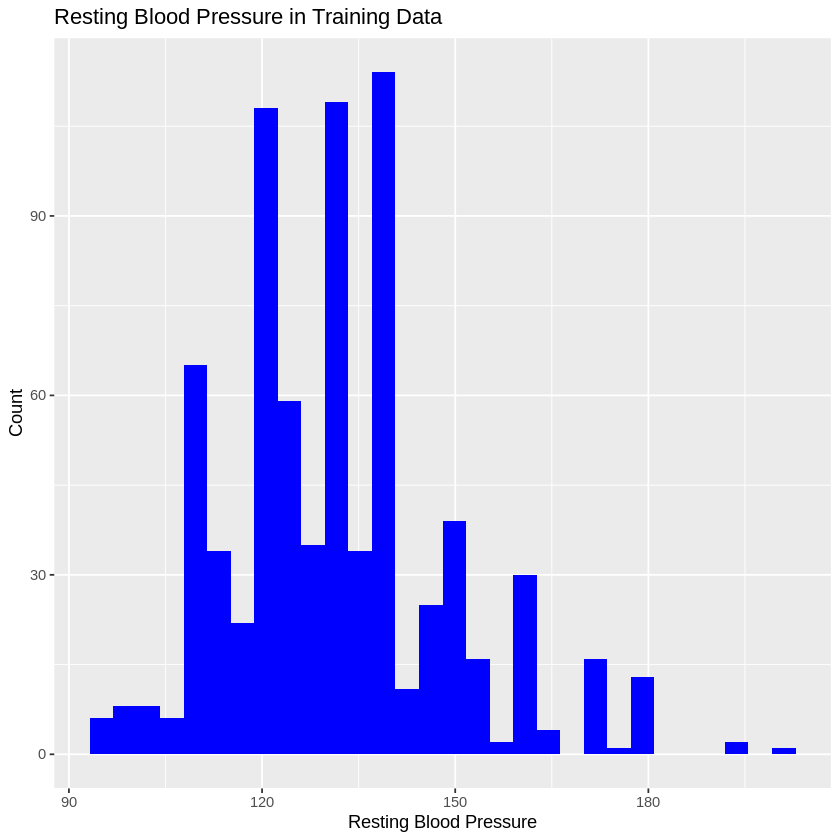

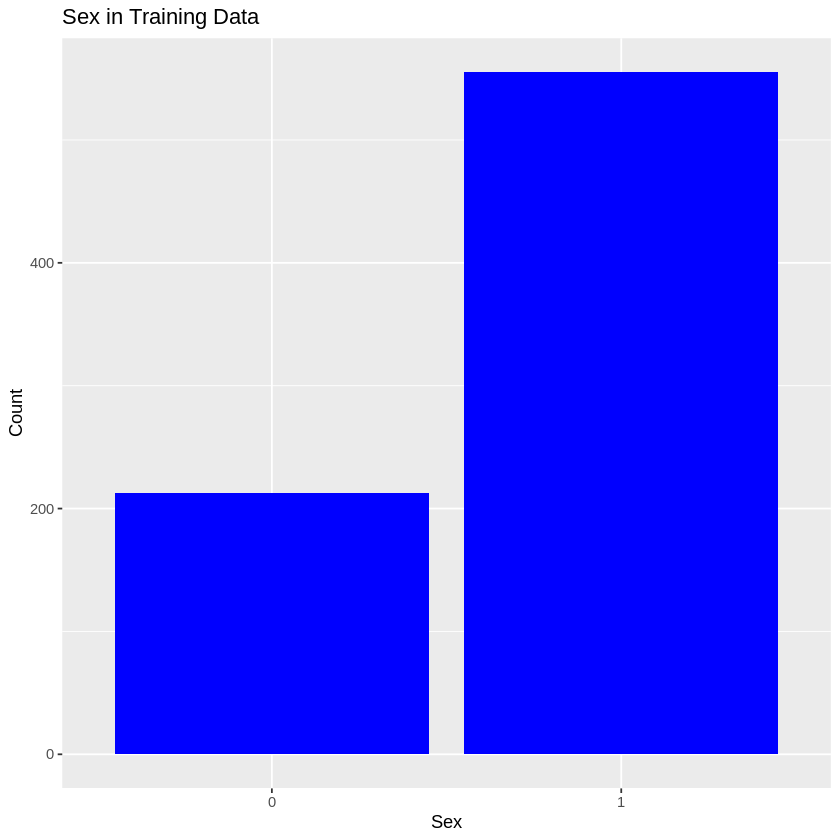

In [53]:
#This is the histogram for the number of people with different types of chest pain in the training dataset
chestpain_hist<-heart_training|>
ggplot(aes(x=cp))+
       geom_histogram(fill = "blue", bins = 30)+
       labs(x="Chest Pain Type", y="Count", title="Histogram of Chest Pain Type in Training Data")
       
chestpain_hist

#This is a box plot for cholesterol levels
chol_plot <- heart_training|>
ggplot(aes(x = factor(target), y = chol)) + 
  geom_boxplot(fill= "blue") +
  labs(x = "Heart Disease Presence", 
       y = "Serum Cholesterol",
       title = "Boxplot of Serum Cholesterol by Heart Disease Presence")

chol_plot

#Histogram for Age
age_hist <- heart_training |>
  ggplot(aes(x=age, fill=..count..)) +
  geom_histogram( bins = 30) +
  labs(x = "Age", y = "Count", title = "Histogram of Age in Training Data")
  
age_hist

#Histogram for Resting Blood Pressure
bp_hist <- heart_training |>
  ggplot(aes(x=trestbps)) +
  geom_histogram(fill = "blue", bins = 30) +
  labs(x = "Resting Blood Pressure", y = "Count", title = "Resting Blood Pressure in Training Data")
  
bp_hist

#Bar Chart for Sex
sex_bar <- heart_training |>
  ggplot(aes(x=factor(sex))) +
  geom_bar(fill = "blue") +
  labs(x = "Sex", y = "Count", title = "Sex in Training Data")
  
sex_bar
